# **10주차 과제**

# Q1~Q2 클래스 설계 문제

- **Q1 생성자 메서드 설정**
    - **생성자 메서드는 아래와 같이 구성되어야 합니다.**  
        - 속성 할당 및 데이터프레임 정보 출력을 수행합니다.  
    - 객체 생성과 속성 설정 과정이 올바르게 수행되는지 평가합니다.

- **Q2 메서드 구현 - 데이터 전처리/변형**
    - **데이터 전처리/변형 메서드는 아래와 같이 구성되어야 합니다.**  
        - 데이터프레임을 Long Form 형태로 변환합니다.  
    - 메서드 이름은 자유이며, 코드셀에 나타난 메서드 이름은 참고로만 활용하셔도 됩니다.  

**확인사항**  
- 클래스 이름, 메서드 이름은 자유롭게 설정하셔도 되며 동일한 결과를 나타내시면 됩니다.   
- 입력인자는 꼼꼼하게 확인해주시길 바랍니다.  
- print, display 함수도 꼼꼼하게 확인하여 출력 결과를 만들어주시길 바랍니다.

In [1]:
# 불필요한 출력을 없애기 위한 코드입니다.
# 문제풀이와는 무관합니다.
import warnings
warnings.filterwarnings('ignore')

In [4]:
class prep_class:

    def __init__(self, df, id_col):
        self.df = df.copy()
        self.id_col = id_col

        print("[DataFrame info]")
        print(f"- shape: {self.df.shape}")
        print(f"- id_col: {self.id_col}")
        self.df.info()

    def transform_melt(self, var_name, value_name, value_col_list):
        raise NotImplementedError("Q2")

## Q1. 클래스 선언 / 생성자 메서드 설정

- 데이터 읽기 및 정보확인용 코드셀입니다.

In [5]:
import pandas as pd

tmp_df = pd.read_csv('./data_과제/pokemon_prep.csv')
display(tmp_df.head())

display(tmp_df['Name'].value_counts().sort_values(ascending=False).head()) # 겹치는 데이터가 있는지 확인하는 과정입니다.
display(tmp_df['Name'].value_counts().sort_values(ascending=True).head()) # 겹치는 데이터가 있는지 확인하는 과정2입니다.

,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65


Name
Charmeleon    1
Zygarde       1
Bulbasaur     1
Ivysaur       1
Venusaur      1
Name: count, dtype: int64

Name
Wartortle         1
Blastoise         1
Mega Blastoise    1
Caterpie          1
Metapod           1
Name: count, dtype: int64

# <img src="./참고이미지/Q1/Q1_0.png" width="100%">

<b>객체 생성 코드 셀</b>
- 이 셀에서는 객체 생성 코드만 작성합니다.
- 데이터프레임 정보 출력은 객채 생성시에 자동으로 출력되도록 구현하세요.

<b>참고</b>
- 클래스의 생성자 메서드가 어떻게 동작하는지 고민해보세요.
- 아래 지정된 외에 다른 코드를 추가하여 해당 결과를 구현할 경우, 오답으로 처리될 수 있습니다.

In [ ]:
import pandas as pd
from IPython.display import display

class prep_class:

    def __init__(self, df, id_col):
        self.df = df.copy()
        self.id_col = id_col
        self.melt_df = None

        print("================== 데이터프레임 중 일부 데이터를 출력합니다. ===================")
        print(self.df.shape)
        display(self.df.head())

        print("\n================== 데이터프레임 info를 출력합니다. ===================")
        print(self.df.info())

        print("\n================== 데이터프레임 describe를 출력합니다. ===================")
        display(self.df.describe())

    def transform_melt(self, var_name, value_name, value_col_list):
        print("================== 변환 이전의 데이터프레임 형태입니다. ===================")
        print(self.df.shape)
        display(self.df.head())

        melted = pd.melt(
            self.df,
            id_vars=[self.id_col],
            value_vars=value_col_list,
            var_name=var_name,
            value_name=value_name
        )

        melted = melted.sort_values(by=[self.id_col]) 

        print("\n================== 변환 이후의 데이터프레임 형태입니다. ===================")
        print(melted.shape)

        self.df = melted
        self.melt_df = melted

tmp_df = pd.read_csv('./data_과제/pokemon_prep.csv')
tmp_class = prep_class(df=tmp_df, id_col="Name")


================== 데이터프레임 중 일부 데이터를 출력합니다. ===================
(773, 7)


,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65



================== 데이터프레임 info를 출력합니다. ===================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             773 non-null    object
 1   HP               773 non-null    int64 
 2   Attack           773 non-null    int64 
 3   Defense          773 non-null    int64 
 4   Special Attack   773 non-null    int64 
 5   Special Defense  773 non-null    int64 
 6   Speed            773 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 42.4+ KB
None

================== 데이터프레임 describe를 출력합니다. ===================


,HP,Attack,Defense,Special Attack,Special Defense,Speed
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,68.931436,77.318241,72.552393,71.182406,70.626132,67.596378
std,25.754605,31.176825,30.114400,31.236588,27.222670,28.511657
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,47.000000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000
75%,80.000000,95.000000,90.000000,91.000000,86.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


<img src="./참고이미지/Q1/Q1_1.png" width="100%">

<b>코드 Cell</b>
- [Q1] 객체의 속성을 확인합니다.
- 속성이 제대로 설정되었는지 확인하기 위한 코드셀입니다.
- 동일한 결과가 나타나는지 확인해주시면 됩니다.

In [139]:

print("==================== 클래스의 df 속성 정보를 출력합니다 ====================")
display(tmp_class.df)

print("\n==================== 클래스의 id_col 속성 정보를 출력합니다 ====================")
print(tmp_class.id_col)

==================== 클래스의 df 속성 정보를 출력합니다 ====================


,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65
...,...,...,...,...,...,...,...
768,Noibat,40,30,35,45,40,55
769,Noivern,85,70,80,97,80,123
770,Xerneas,126,131,95,131,98,99
771,Yveltal,126,131,95,131,98,99



==================== 클래스의 id_col 속성 정보를 출력합니다 ====================
Name


<img src="./참고이미지/Q1/Q1_2.png" width="100%">

## Q2. 데이터 변형 메서드 구현

<b>설명</b>
- [Q1~Q2 클래스 설계 문제] - Q2 메서드를 실행합니다.

- 정렬 순서도 지켜주셔야 하며, 정렬 과정은 메서드 내에서 구현되어야 합니다.
- 정렬은 Name 컬럼 기준으로 오름차순으로 정렬합니다.

In [143]:
tmp_class.transform_melt(var_name='ability',
                         value_name='score',
                         value_col_list=['HP','Attack','Defense',
                                         'Special Attack','Special Defense','Speed'])

tmp_class.df

================== 변환 이전의 데이터프레임 형태입니다. ===================
(773, 7)


,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65



================== 변환 이후의 데이터프레임 형태입니다. ===================
(4638, 3)


,Name,ability,score
3583,Abomasnow,Special Defense,85
2037,Abomasnow,Defense,75
1264,Abomasnow,Attack,92
491,Abomasnow,HP,90
4356,Abomasnow,Speed,60
...,...,...,...
3091,Zygarde,Special Attack,81
1545,Zygarde,Attack,100
772,Zygarde,HP,108
3864,Zygarde,Special Defense,95


<img src="./참고이미지/Q2/Q2_1.png" width="100%">

<b>코드 Cell</b>
- 속성 확인 결과입니다.
- 동일한 결과를 출력할 수 있어야 합니다.

In [144]:
tmp_class.melt_df

,Name,ability,score
3583,Abomasnow,Special Defense,85
2037,Abomasnow,Defense,75
1264,Abomasnow,Attack,92
491,Abomasnow,HP,90
4356,Abomasnow,Speed,60
...,...,...,...
3091,Zygarde,Special Attack,81
1545,Zygarde,Attack,100
772,Zygarde,HP,108
3864,Zygarde,Special Defense,95


<img src="./참고이미지/Q2/Q2_2.png" width="100%">

# Q3. 함수 선언 - 요구된 명령어에 맞게 동작하는 함수를 설계해주세요

<b>1. 문제설명) 명령어에 맞게 동작을 수행하는 사용자 정의 함수를 선언해주세요</b>
- Boxplot 시각화 : 입력된 컬럼들에 대하여 boxplot 시각화를 수행합니다.
- 상관관계 시각화 : 입력된 컬럼들에 대하여 상관관계 시각화를 수행합니다.
- 정지 : "동작을 정지합니다."를 출력한 이후 동작을 종료합니다.
- 위에 해당하지 않는 경우 : "존재하지 않는 명령어입니다. 다시 실행합니다."를 출력 후, 다시 명령어 입력 동작을 수행합니다.

<b>2. 명령어 입력</b>
- 명령어 입력은 input 함수를 통해 이루어졌습니다.

<b>3. 셀 출력 순서</b>
- 아래의 사용자 정의 함수 출력은 아래 명령어 순서에 따라 이루어졌습니다.  
    - "Boxplot 시각화" 입력  
    - "상관관계 시각화" 입력  
    - "존재하지 않는 명령어(=어떤 문장이든 상관없습니다.)" 입력  
    - "정지" 입력 후, 동작 정지  

<b>4. 조건</b>
- "정지" 명령어를 입력하기 전에는 함수 동작이 종료되지 않아야 합니다.

<b>코드 Cell</b>
- 데이터를 새롭게 불러오기 위한 코드셀입니다.

In [129]:
import pandas as pd

tmp_df = pd.read_csv('./data_과제/pokemon_prep.csv')
display(tmp_df.head())

display(tmp_df['Name'].value_counts().sort_values(ascending=False).head()) # 겹치는 데이터가 있는지 확인하는 과정입니다.
display(tmp_df['Name'].value_counts().sort_values(ascending=True).head()) # 겹치는 데이터가 있는지 확인하는 과정2입니다.

display(tmp_df.info())

,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65


Name
Charmeleon    1
Zygarde       1
Bulbasaur     1
Ivysaur       1
Venusaur      1
Name: count, dtype: int64

Name
Wartortle         1
Blastoise         1
Mega Blastoise    1
Caterpie          1
Metapod           1
Name: count, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             773 non-null    object
 1   HP               773 non-null    int64 
 2   Attack           773 non-null    int64 
 3   Defense          773 non-null    int64 
 4   Special Attack   773 non-null    int64 
 5   Special Defense  773 non-null    int64 
 6   Speed            773 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 42.4+ KB


None

<img src="./참고이미지/Q3/Q3_1.png" width="60%">

<코드 Cell>
- 함수 정의를 수행하는 코드셀입니다.
- 조건에 맞게 코드를 작성해주세요.

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_func(df, numeric_col_list, command=None):
    if command is None:  # 기본 실행 상태
        print("="*30, " 경우의 수 : 함수 기본 실행 상태 ", "="*30)
        print("데이터프레임입니다.\n")
        display(df.head())
        print("\n컬럼 목록입니다.")
        print(numeric_col_list)
        print("명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]")

    elif command == "Boxplot 시각화":
        print("="*30, " 경우의 수 : Boxplot 시각화 입력 ", "="*30)
        print("동작을 계속 수행합니다.\n")

        for col in numeric_col_list:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col])
            plt.title(col)
            plt.show()
        print("Boxplot 시각화를 완료했습니다.")
        print("명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]")

    elif command == "상관관계 시각화":
        print("="*30, " 경우의 수 : 상관관계 시각화 입력 ", "="*30)

        corr = df[numeric_col_list].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap="RdPu", vmin=-1, vmax=1)
        plt.title("Correlation Heatmap")
        plt.show()

        print("상관관계 시각화를 완료했습니다.")
        print("명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]")

    elif command == "정지":
        print("="*30, " 경우의 수 : 정지 입력 ", "="*30)
        print("동작을 정지합니다.")

    else:
        print("="*30, " 경우의 수 : 존재하지 않는 명령어 입력 ", "="*30)
        print("존재하지 않는 명령어입니다. 다시 실행합니다.")
        print("명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]")


<b>코드 실행 Cell</b>
1. 코드 Cell
    - 함수를 실행하는 코드셀입니다.

2. 조건
    - 반드시, 해당 코드셀에서는 함수 실행만 이루어져야 합니다.
    - 아래와 동일한 입력인자에 대해서, 동일한 출력이 이루어져야 합니다.
    - 출력 결과를 만족시키기 위해 추가 코드를 작성할 경우 오답으로 처리될 수 있습니다.
    - 명령어 입력은 input 함수를 통해 수행합니다.

In [166]:
visualize_func(df=tmp_df,
               numeric_col_list = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed'])

==============================  경우의 수 : 함수 기본 실행 상태  ==============================
데이터프레임입니다.



,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65



컬럼 목록입니다.
['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]


In [172]:
visualize_func(tmp_df, ['HP','Attack','Defense','Special Attack','Special Defense','Speed'])


==============================  경우의 수 : 함수 기본 실행 상태  ==============================
데이터프레임입니다.



,Name,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Bulbasaur,45,49,49,65,65,45
1,Ivysaur,60,62,63,80,80,60
2,Venusaur,80,82,83,100,100,80
3,Mega Venusaur,80,100,123,122,120,80
4,Charmander,39,52,43,60,50,65



컬럼 목록입니다.
['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]


<img src="./참고이미지/Q3/Q3_2.png" width="50%">

==============================  경우의 수 : Boxplot 시각화 입력  ==============================
동작을 계속 수행합니다.



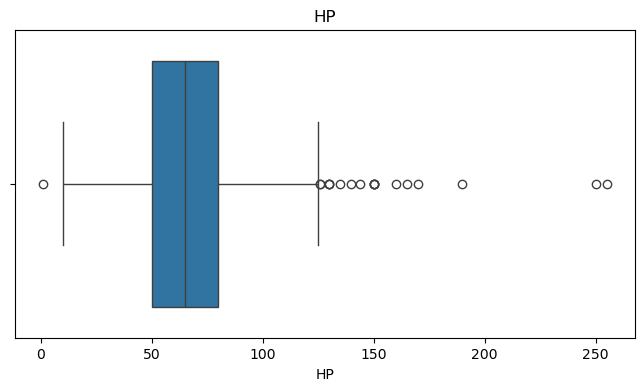

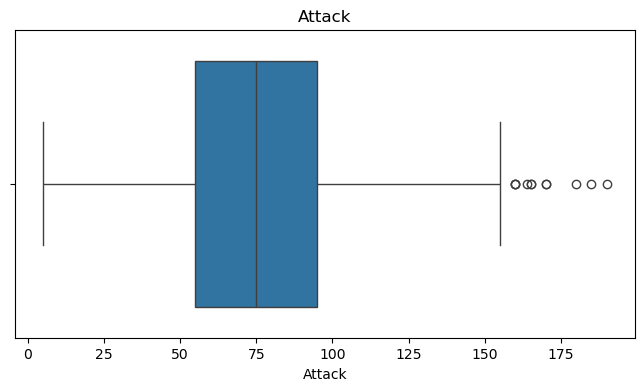

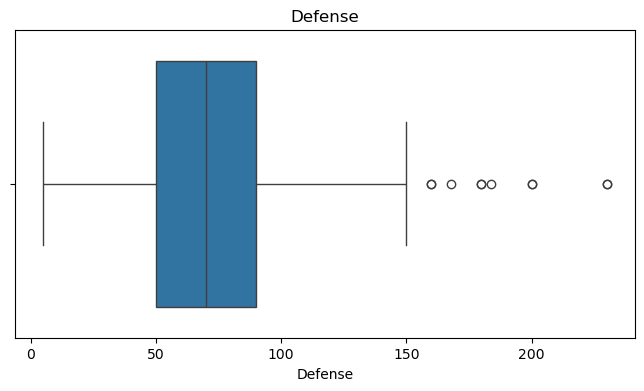

Boxplot 시각화를 완료했습니다.
명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]


In [169]:
visualize_func(tmp_df, ['HP','Attack','Defense'], command="Boxplot 시각화")


<img src="./참고이미지/Q3/Q3_3.png" width="55%">

==============================  경우의 수 : Boxplot 시각화 입력  ==============================
동작을 계속 수행합니다.



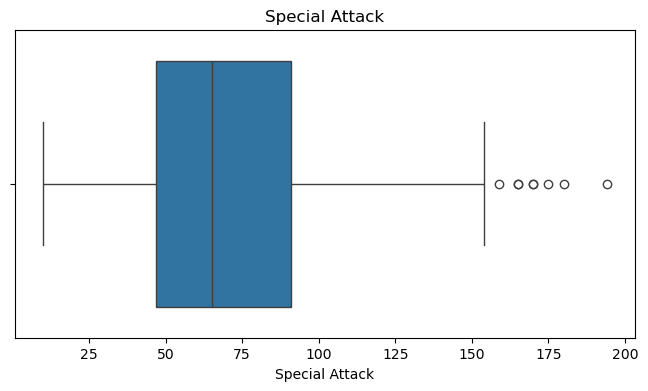

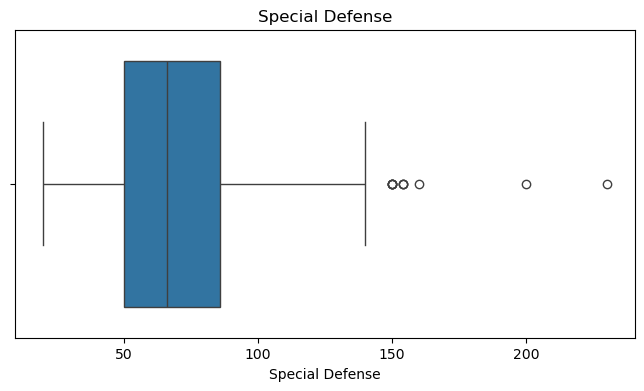

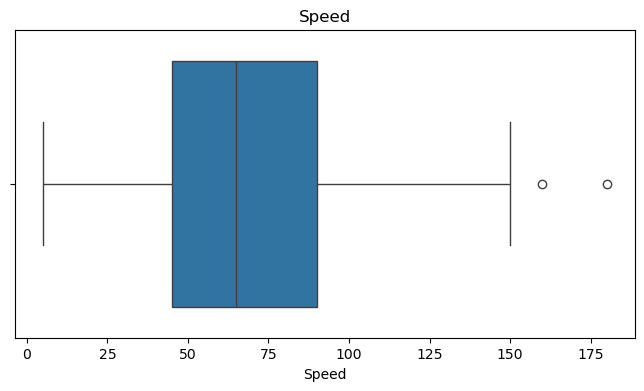

In [163]:
numeric_cols = ['Special Attack', 'Special Defense', 'Speed']
visualize_func(tmp_df, numeric_cols, command="Boxplot 시각화")

<img src="./참고이미지/Q3/Q3_4.png" width="55%">

==============================  경우의 수 : 상관관계 시각화 입력  ==============================


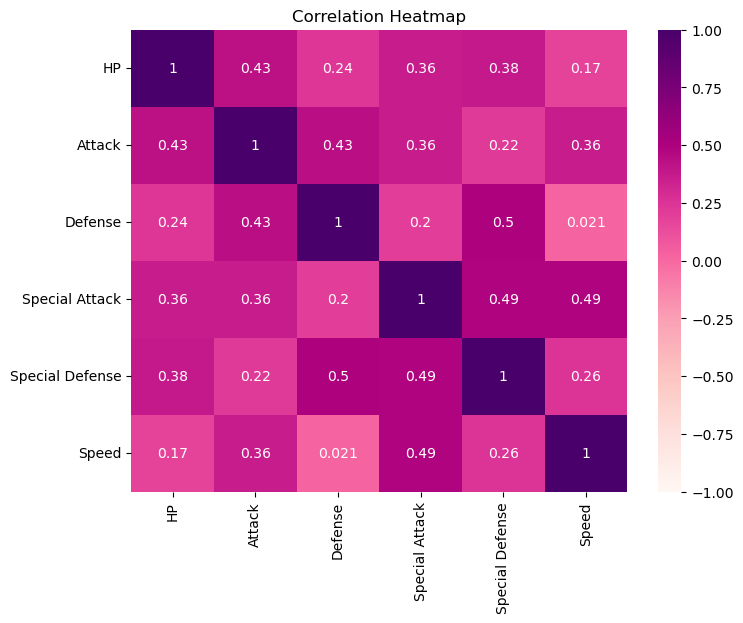

상관관계 시각화를 완료했습니다.
명령어를 입력해주세요. 명령어 [Boxplot 시각화, 상관관계 시각화, 정지]


In [170]:
numeric_cols = ['HP','Attack','Defense','Special Attack','Special Defense','Speed']

# 상관관계 시각화
visualize_func(tmp_df, numeric_cols, command="상관관계 시각화")


<img src="./참고이미지/Q3/Q3_5.png" width="55%">

# Q4. 데이터 전처리 - Pandas 데이터 전처리

<img src="./참고이미지/ERD_이미지.png" width="50%">

URL : https://www.mysqltutorial.org/getting-started-with-mysql/mysql-sample-database/

<b>1. 데이터</b>
- employees.csv
- customers.csv

<b>2. 설명</b>
- employees 데이터에는 reportsTo 컬럼이 존재합니다.
- reportTo에 적혀있는 employeeNumber를 가진 직원을 직속 상사, report를 하는 직원을 직속 부하로 취급합니다.
- 한 명의 상사가 여러 명의 부하가 있는 경우가 존재할 수 있습니다.
- 가장 상급자의 경우, 직속 상사가 없습니다.
- 자세한 세부 과정은 내용은 아래 전처리 과정들과 출력 결과를 참고 바랍니다.

<b>3. 최종 결과</b>    
- 최종적으로는, 직원별로 직속 부하들이 관리하는 고객들의 평균 creditLimit을 구합니다.

<b>코드 Cell</b>
- 데이터 확인 및 읽기용 코드셀입니다.
- 데이터 읽기에 활용하시거나, 참고용으로만 활용하시면 됩니다.

In [177]:
import pandas as pd
employees_df = pd.read_csv('./data_과제/sampledatabase/employees.csv')
customeres_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')

print('='*10, 'employees.csv 정보입니다.', '='*10)
display(employees_df.shape)
display(employees_df.head())

print('='*10, 'customers.csv 정보입니다.', '='*10)
display(customeres_df.shape)
display(customeres_df.head())

========== employees.csv 정보입니다. ==========


(23, 8)

,employeeNumber,lastName,firstName,extension,email,officeCode,reportsTo,jobTitle
0,1002,Murphy,Diane,x5800,dmurphy@classicmodelcars.com,1,NaN,President
1,1056,Patterson,Mary,x4611,mpatterso@classicmodelcars.com,1,1002.0,VP Sales
2,1076,Firrelli,Jeff,x9273,jfirrelli@classicmodelcars.com,1,1002.0,VP Marketing
3,1088,Patterson,William,x4871,wpatterson@classicmodelcars.com,6,1056.0,Sales Manager (APAC)
4,1102,Bondur,Gerard,x5408,gbondur@classicmodelcars.com,4,1056.0,Sale Manager (EMEA)


========== customers.csv 정보입니다. ==========


(122, 13)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700.0


<img src="./참고이미지/Q4/Q4_1.png" width="70%">

<b>코드 Cell</b>
- employees 데이터에 대한 전처리 과정입니다.
- 직속 상사의 LastName, 직속 상사의 직급, 직속 부하의 LastName, 직속 부하의 직급, 직속부하의 직원번호 데이터를 정리합니다.
- 데이터를 적절히 분할하고 결합하는 과정이 필요할 수 있습니다.
- 셀 출력에서는 데이터를 간편하게 보기 위해, 컬럼 이름 변경, 컬럼 순서 변경 등의 작업을 수행했습니다.

In [204]:
import pandas as pd

employees_df = pd.read_csv('./data_과제/sampledatabase/employees.csv')

print("================== 컬럼을 정리하는 중간 과정입니다. ===================")
print(merged_view.shape)
display(merged_view.head())
print(merged_view.columns)

result = merged[[
    "lastName_Boss", "jobTitle_Boss",
    "lastName_Reporter", "jobTitle_Reporter",
    "employeeNumber_Reporter"
]].copy()

result.columns = [
    "BossLastName", "Boss_JobTitle",
    "Reporter_LastName", "Reporter_JobTitle",
    "Reporter_EmpNumber"
]

result = result.dropna()

print("\n================== 직속 상사, 직속 부하에 대한 정리 결과입니다. ===================")
print(result.shape)
display(result.head(5))


================== 컬럼을 정리하는 중간 과정입니다. ===================
(23, 7)


,Reporter_LastName,Reporter_JobTitle,Reporter_EmpNumber,reportsTo,Boss_EmpNumber,BossLastName,Boss_JobTitle
0,Murphy,President,1002,NaN,NaN,NaN,NaN
1,Patterson,VP Sales,1056,1002.0,1002.0,Murphy,President
2,Firrelli,VP Marketing,1076,1002.0,1002.0,Murphy,President
3,Patterson,Sales Manager (APAC),1088,1056.0,1056.0,Patterson,VP Sales
4,Bondur,Sale Manager (EMEA),1102,1056.0,1056.0,Patterson,VP Sales


Index(['Reporter_LastName', 'Reporter_JobTitle', 'Reporter_EmpNumber',
       'reportsTo', 'Boss_EmpNumber', 'BossLastName', 'Boss_JobTitle'],
      dtype='object')

================== 직속 상사, 직속 부하에 대한 정리 결과입니다. ===================
(22, 5)


,BossLastName,Boss_JobTitle,Reporter_LastName,Reporter_JobTitle,Reporter_EmpNumber
1,Murphy,President,Patterson,VP Sales,1056
2,Murphy,President,Firrelli,VP Marketing,1076
3,Patterson,VP Sales,Patterson,Sales Manager (APAC),1088
4,Patterson,VP Sales,Bondur,Sale Manager (EMEA),1102
5,Patterson,VP Sales,Bow,Sales Manager (NA),1143


<img src="./참고이미지/Q4/Q4_2.png" width="45%">

<b>코드 Cell</b>
- 위에서 정리한 데이터 정보와 customer.csv 정보를 결합합니다.
- salesRepEmployeeNumber에 적혀있는 직원번호가 해당 고객을 관리하는 직원의 직원번호입니다.

In [205]:
import pandas as pd

employees_df = pd.read_csv('./data_과제/sampledatabase/employees.csv')
customers_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')

merged = pd.merge(
    employees_df, employees_df,
    how="left",
    left_on="reportsTo",
    right_on="employeeNumber",
    suffixes=("_Reporter", "_Boss")
)

result = merged[[
    "lastName_Boss", "jobTitle_Boss",
    "lastName_Reporter", "jobTitle_Reporter",
    "employeeNumber_Reporter"
]].copy()

result.columns = [
    "BossLastName", "Boss_JobTitle",
    "Reporter_LastName", "Reporter_JobTitle",
    "Reporter_EmpNumber"
]

result = result.dropna()

print("\n================== 직책 데이터와 customers_df 데이터를 결합합니다. ===================")
final = pd.merge(
    result,
    customers_df,
    how="left",
    left_on="Reporter_EmpNumber",
    right_on="salesRepEmployeeNumber"
)

print(final.shape)
display(final.head(10))
print(final.columns)

print("\n================== 필요한 컬럼 정보만 남겨 데이터를 정리합니다. ===================")
final_view = final[[
    "BossLastName", "Boss_JobTitle",
    "Reporter_LastName", "Reporter_JobTitle", "Reporter_EmpNumber",
    "salesRepEmployeeNumber", "customerName", "creditLimit"
]].copy()

print(final_view.shape)
display(final_view.head(20))



================== 직책 데이터와 customers_df 데이터를 결합합니다. ===================
(107, 18)


,BossLastName,Boss_JobTitle,Reporter_LastName,Reporter_JobTitle,Reporter_EmpNumber,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,Murphy,President,Patterson,VP Sales,1056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Murphy,President,Firrelli,VP Marketing,1076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Patterson,VP Sales,Patterson,Sales Manager (APAC),1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Patterson,VP Sales,Bondur,Sale Manager (EMEA),1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Patterson,VP Sales,Bow,Sales Manager (NA),1143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,124.0,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,NaN,San Rafael,CA,97562,USA,1165.0,210500.0
6,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,129.0,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,94217,USA,1165.0,64600.0
7,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,161.0,Technics Stores Inc.,Hashimoto,Juri,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,1165.0,84600.0
8,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,321.0,Corporate Gift Ideas Co.,Brown,Julie,6505551386,7734 Strong St.,NaN,San Francisco,CA,94217,USA,1165.0,105000.0
9,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,450.0,The Sharp Gifts Warehouse,Frick,Sue,4085553659,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,1165.0,77600.0


Index(['BossLastName', 'Boss_JobTitle', 'Reporter_LastName',
       'Reporter_JobTitle', 'Reporter_EmpNumber', 'customerNumber',
       'customerName', 'contactLastName', 'contactFirstName', 'phone',
       'addressLine1', 'addressLine2', 'city', 'state', 'postalCode',
       'country', 'salesRepEmployeeNumber', 'creditLimit'],
      dtype='object')

================== 필요한 컬럼 정보만 남겨 데이터를 정리합니다. ===================
(107, 8)


,BossLastName,Boss_JobTitle,Reporter_LastName,Reporter_JobTitle,Reporter_EmpNumber,salesRepEmployeeNumber,customerName,creditLimit
0,Murphy,President,Patterson,VP Sales,1056,NaN,NaN,NaN
1,Murphy,President,Firrelli,VP Marketing,1076,NaN,NaN,NaN
2,Patterson,VP Sales,Patterson,Sales Manager (APAC),1088,NaN,NaN,NaN
3,Patterson,VP Sales,Bondur,Sale Manager (EMEA),1102,NaN,NaN,NaN
4,Patterson,VP Sales,Bow,Sales Manager (NA),1143,NaN,NaN,NaN
5,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,1165.0,Mini Gifts Distributors Ltd.,210500.0
6,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,1165.0,Mini Wheels Co.,64600.0
7,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,1165.0,Technics Stores Inc.,84600.0
8,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,1165.0,Corporate Gift Ideas Co.,105000.0
9,Bow,Sales Manager (NA),Jennings,Sales Rep,1165,1165.0,The Sharp Gifts Warehouse,77600.0


<img src="./참고이미지/Q4/Q4_3.png" width="100%">

<b>코드 Cell</b>
- 최종 결과입니다.
- 직속 부하가 관리하는 고객들의 creditLimit의 평균값을 계산합니다.
- 집계한 creditLimit 정보를 기준으로 내림차순 정렬을 수행한 뒤에, 순위를 매깁니다.

In [210]:
import pandas as pd

employees_df = pd.read_csv('./data_과제/sampledatabase/employees.csv')
customers_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')

merged = pd.merge(
    employees_df, employees_df,
    how="left",
    left_on="reportsTo",
    right_on="employeeNumber",
    suffixes=("_Reporter", "_Boss")
)

result = merged[[
    "lastName_Boss", "jobTitle_Boss",
    "lastName_Reporter", "jobTitle_Reporter",
    "employeeNumber_Reporter"
]].copy()

result.columns = [
    "BossLastName", "Boss_JobTitle",
    "Reporter_LastName", "Reporter_JobTitle",
    "Reporter_EmpNumber"
]

result = result.dropna()

final = pd.merge(
    result,
    customers_df,
    how="left",
    left_on="Reporter_EmpNumber",
    right_on="salesRepEmployeeNumber"
)

final_view = final[[
    "BossLastName", "Boss_JobTitle",
    "Reporter_LastName", "Reporter_JobTitle",
    "Reporter_EmpNumber", "customerName", "creditLimit"
]].copy()

print("\n================== 최종 결과입니다. ===================")
agg = (
    final_view.groupby(["BossLastName", "Boss_JobTitle"])
    ["creditLimit"]
    .mean()
    .reset_index()
)

agg = agg.sort_values("creditLimit", ascending=False).reset_index(drop=True)
agg.index += 1
agg = agg.reset_index().rename(columns={"index": "RANK"})

display(agg.head(4))



================== 최종 결과입니다. ===================


,RANK,BossLastName,Boss_JobTitle,creditLimit
0,1,Patterson,Sales Manager (APAC),89070.000000
1,2,Bondur,Sale Manager (EMEA),84867.391304
2,3,Patterson,VP Sales,83900.000000
3,4,Bow,Sales Manager (NA),77956.410256


<img src="./참고이미지/Q4/Q4_4.png" width="40%">

# Q5. 데이터 전처리 - Python MySQL

<b>주의사항</b>
- 반드시, 하나의 쿼리문을 통해 동일한 결과를 도출해야 합니다.
- 쿼리를 두 번에 나누어서 적용할 경우, 오답으로 처리될 수 있습니다.

In [211]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",      
    user="root",           
    password="0000",
    database="classicmodels" 
)

cursor = conn.cursor()
print("mysql 연결됨")

mysql 연결됨


In [215]:
query = """
SELECT 
    CAST(@rank := @rank + 1 AS UNSIGNED) AS `RANK`,
    t.BossLastName,
    t.Boss_JobTitle,
    t.creditLimit
FROM (
    SELECT 
        e2.lastName AS BossLastName,
        e2.jobTitle AS Boss_JobTitle,
        AVG(c.creditLimit) AS creditLimit
    FROM employees e1
    JOIN employees e2
        ON e1.reportsTo = e2.employeeNumber
    JOIN customers c
        ON e1.employeeNumber = c.salesRepEmployeeNumber
    GROUP BY e2.lastName, e2.jobTitle
    ORDER BY creditLimit DESC
    LIMIT 4
) t, (SELECT @rank := 0) r;
"""

pd.read_sql(query, conn)


,RANK,BossLastName,Boss_JobTitle,creditLimit
0,1,Patterson,Sales Manager (APAC),89070.000000
1,2,Bondur,Sale Manager (EMEA),84867.391304
2,3,Patterson,VP Sales,83900.000000
3,4,Bow,Sales Manager (NA),77956.410256


<img src="./참고이미지/Q5/Q5_1.png" width="80%">

# Q6. 데이터 전처리2 - Pandas 데이터 전처리

<b>1. 데이터</b>
- orders.csv / orderdetails.csv / customers.csv

<b>2. 최종 결과</b>
- 고객별로 가장 큰 주문금액, 가장 작은 주문 금액, 이들의 차이에 대한 데이터를 구합니다.  
- 이들을 각격 차이를 기준으로 내림차순하고 20위까지 등수를 매깁니다.  
- 데이터 중에서 customer의 country는 USA, orders의 stauts는 Shipped로 필터링을 합니다.  

<b>※ 참고</b>
- 자세한 세부 과정은 내용은 아래 전처리 과정들과 출력 결과를 참고 바랍니다.

<b>코드 Cell 설명</b>
- 데이터 확인 및 읽기용 코드셀입니다.
- 데이터 읽기에 활용하시거나, 참고용으로만 활용하시면 됩니다.

In [132]:
import pandas as pd
customers_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')
orders_df = pd.read_csv('./data_과제/sampledatabase/orders.csv')
order_details_df = pd.read_csv('./data_과제/sampledatabase/orderdetails.csv')

print('========== customers_df 정보 ==========')
print(customers_df.shape)
display(customers_df.head())

print('========== orders_df 정보 ==========')
print(orders_df.shape)
display(orders_df.sort_values(by='customerNumber', ascending=True).head())

print('========== order_details_df 정보 ==========')
print(order_details_df.shape)
display(order_details_df.head())

========== customers_df 정보 ==========
(122, 13)


,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",NaN,Nantes,NaN,44000,France,1370.0,21000.0
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,NaN,Las Vegas,NV,83030,USA,1166.0,71800.0
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300.0
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,1370.0,118200.0
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,1504.0,81700.0


========== orders_df 정보 ==========
(326, 7)


,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
23,10123,2003-05-20,2003-05-29,2003-05-22,Shipped,NaN,103
245,10345,2004-11-25,2004-12-01,2004-11-26,Shipped,NaN,103
198,10298,2004-09-27,2004-10-05,2004-10-01,Shipped,NaN,103
24,10124,2003-05-21,2003-05-29,2003-05-25,Shipped,Customer very concerned about the exact color ...,112
246,10346,2004-11-29,2004-12-05,2004-11-30,Shipped,NaN,112


========== order_details_df 정보 ==========
(2996, 5)


,orderNumber,productCode,quantityOrdered,priceEach,orderLineNumber
0,10100,S18_1749,30,136.00,3
1,10100,S18_2248,50,55.09,2
2,10100,S18_4409,22,75.46,4
3,10100,S24_3969,49,35.29,1
4,10101,S18_2325,25,108.06,4


<img src="./참고이미지/Q6/Q6_1.png" width="80%">

<b>코드 Cell 설명</b>
- orderdetails 데이터에서 total_order_value 컬럼을 추가 및 집계를 수행합니다.
    - total_order_value = quantityOrdered * priceEach로 계산합니다.
    - total_order_values는 총 주문금액을 의미합니다.
    - 집계 연산을 수행하여 orderNumber별로 total_order_value 합계를 계산합니다.

In [ ]:
import pandas as pd

orderdetails_df = pd.read_csv('./data_과제/sampledatabase/orderdetails.csv')

orderdetails_df['total_order_value'] = orderdetails_df['quantityOrdered'] * orderdetails_df['priceEach']

first_view = orderdetails_df[['orderNumber', 'quantityOrdered', 'priceEach', 'total_order_value']]

print(first_view.shape)
display(first_view.head())

order_summary = orderdetails_df.groupby('orderNumber', as_index=False)['total_order_value'].sum()

print(order_summary.shape)
display(order_summary.head())


(2996, 4)


,orderNumber,quantityOrdered,priceEach,total_order_value
0,10100,30,136.00,4080.00
1,10100,50,55.09,2754.50
2,10100,22,75.46,1660.12
3,10100,49,35.29,1729.21
4,10101,25,108.06,2701.50


(326, 2)


,orderNumber,total_order_value
0,10100,10223.83
1,10101,10549.01
2,10102,5494.78
3,10103,50218.95
4,10104,40206.20


<img src="./참고이미지/Q6/Q6_2.png" width="30%">

<b>코드 Cell 설명</b>
- orders_df 데이터에서 status == 'Shipped'인 데이터만 남깁니다.

In [224]:
shipped_orders = (
    orders_df[orders_df['status'] == 'Shipped']
    [['customerNumber', 'orderNumber', 'orderDate', 'status']]
    .sort_values(by='customerNumber')
    .reset_index(drop=True)
)

display(shipped_orders)


,customerNumber,orderNumber,orderDate,status
0,103,10345,2004-11-25,Shipped
1,103,10298,2004-09-27,Shipped
2,103,10123,2003-05-20,Shipped
3,112,10346,2004-11-29,Shipped
4,112,10278,2004-08-06,Shipped
...,...,...,...,...
298,495,10207,2003-12-09,Shipped
299,495,10243,2004-04-26,Shipped
300,496,10399,2005-04-01,Shipped
301,496,10360,2004-12-16,Shipped


<img src="./참고이미지/Q6/Q6_3.png" width="30%">

<b>코드 Cell 설명</b>
- 위에서 전처리한 데이터를 결합합니다.
- status = 'Shipped'인 orderNumber에 대한 total_order_value를 확인할 수 있습니다.

In [228]:
orderdetails_df['total_order_value'] = (
    orderdetails_df['quantityOrdered'] * orderdetails_df['priceEach']
)

order_total = (
    orderdetails_df.groupby('orderNumber', as_index=False)['total_order_value']
    .sum()
)

shipped_orders = orders_df[orders_df['status'] == 'Shipped'][[
    'customerNumber', 'orderNumber', 'orderDate', 'status'
]]

merged = pd.merge(
    shipped_orders,
    order_total,
    on='orderNumber',
    how='inner'
).sort_values(by='customerNumber').reset_index(drop=True)

display(merged.head())


,customerNumber,orderNumber,orderDate,status,total_order_value
0,103,10345,2004-11-25,Shipped,1676.14
1,103,10298,2004-09-27,Shipped,6066.78
2,103,10123,2003-05-20,Shipped,14571.44
3,112,10346,2004-11-29,Shipped,14191.12
4,112,10278,2004-08-06,Shipped,33347.88


<img src="./참고이미지/Q6/Q6_4.png" width="40%">

<b>Cell 설명</b>
- customers에 대한 데이터입니다.
- 전처리를 통하여 country가 USA인 customer만 남깁니다.

In [ ]:
import pandas as pd

customers_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')[['customerNumber', 'country']]

print("========== customers 데이터입니다. ==========")
print(customers_df.shape)
display(customers_df.head())

usa_customers = customers_df[customers_df['country'] == 'USA']

print("\n========== country에서 USA만 남긴 상태입니다. ==========")
print(usa_customers.shape)
display(usa_customers.head())


========== customers 데이터입니다. ==========
(122, 2)


,customerNumber,country
0,103,France
1,112,USA
2,114,Australia
3,119,France
4,121,Norway



========== country에서 USA만 남긴 상태입니다. ==========
(36, 2)


,customerNumber,country
1,112,USA
5,124,USA
8,129,USA
9,131,USA
15,151,USA


<img src="./참고이미지/Q6/Q6_5.png" width="40%">

<b>Cell 설명</b>
- 전처리 데이터들을 결합합니다.
- 최종적으로, 주문상태는 'Shipped', customer의 country는 USA, 주문별 total_order_value 정보를 포함한 데이터가 만들어집니다.

In [233]:
import pandas as pd

orders_df = pd.read_csv('./data_과제/sampledatabase/orders.csv')
orderdetails_df = pd.read_csv('./data_과제/sampledatabase/orderdetails.csv')
customers_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')

orderdetails_df['total_order_value'] = orderdetails_df['quantityOrdered'] * orderdetails_df['priceEach']
order_value_df = orderdetails_df.groupby('orderNumber', as_index=False)['total_order_value'].sum()

orders_shipped = orders_df[orders_df['status'] == 'Shipped'][['customerNumber', 'orderNumber', 'orderDate', 'status']]

merged = pd.merge(orders_shipped, order_value_df, on='orderNumber', how='inner')

customers_usa = customers_df[customers_df['country'] == 'USA'][['customerNumber', 'country']]

final_df = pd.merge(merged, customers_usa, on='customerNumber', how='inner')

final_df = final_df.sort_values(by='customerNumber', ascending=True).reset_index(drop=True)

print(final_df.shape)
display(final_df.head())


(105, 6)


,customerNumber,orderNumber,orderDate,status,total_order_value,country
0,112,10124,2003-05-21,Shipped,32641.98,USA
1,112,10278,2004-08-06,Shipped,33347.88,USA
2,112,10346,2004-11-29,Shipped,14191.12,USA
3,124,10142,2003-08-08,Shipped,56052.56,USA
4,124,10182,2003-11-12,Shipped,45084.38,USA


<img src="./참고이미지/Q6/Q6_6.png" width="45%">

<b>최종 결과</b>
- customerNumber 별로 총주문금액의 최대, 최소, 최대값과 최소값의 차이를 나타냅니다.
- 해당 결과를 최대값과 최소값의 차이를 기준으로 내림차순으로 정렬한 이후에, 순위를 부여합니다.

In [ ]:
import pandas as pd

orders_df = pd.read_csv('./data_과제/sampledatabase/orders.csv')
orderdetails_df = pd.read_csv('./data_과제/sampledatabase/orderdetails.csv')
customers_df = pd.read_csv('./data_과제/sampledatabase/customers.csv')

orderdetails_df['total_order_value'] = orderdetails_df['quantityOrdered'] * orderdetails_df['priceEach']
order_value_df = orderdetails_df.groupby('orderNumber', as_index=False)['total_order_value'].sum()

orders_shipped = orders_df[orders_df['status'] == 'Shipped'][['customerNumber', 'orderNumber', 'orderDate', 'status']]

merged = pd.merge(orders_shipped, order_value_df, on='orderNumber', how='inner')

customers_usa = customers_df[customers_df['country'] == 'USA'][['customerNumber', 'country']]
final_df = pd.merge(merged, customers_usa, on='customerNumber', how='inner')

agg_df = final_df.groupby('customerNumber').agg(
    order_value_max=('total_order_value', 'max'),
    order_value_min=('total_order_value', 'min')
).reset_index()

agg_df['order_value_diff'] = agg_df['order_value_max'] - agg_df['order_value_min']

agg_df = agg_df.sort_values(by='order_value_diff', ascending=False).reset_index(drop=True)
agg_df.insert(0, 'RANK', agg_df.index + 1)

print(agg_df.shape)
display(agg_df.head(20))


(35, 5)


,RANK,customerNumber,order_value_max,order_value_min,order_value_diff
0,1,495,59265.14,6276.60,52988.54
1,2,124,56052.56,4466.71,51585.85
2,3,161,50743.65,2434.25,48309.40
3,4,204,51152.86,4424.40,46728.46
4,5,205,50342.74,3879.96,46462.78
5,6,363,55425.77,10223.83,45201.94
6,7,320,52548.49,8307.28,44241.21
7,8,321,54682.68,14155.57,40527.11
8,9,486,45994.07,5899.38,40094.69
9,10,181,44400.50,5494.78,38905.72


<img src="./참고이미지/Q6/Q6_7.png" width="40%">

# Q7. 데이터 전처리 - Python MySQL

<b>참고 사항</b>
- 반드시, 하나의 쿼리문을 통해 동일한 결과를 도출해야 합니다.
- 쿼리를 두 번에 나누어서 적용할 경우, 오답으로 처리될 수 있습니다.

In [235]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",      
    user="root",           
    password="0000",
    database="classicmodels" 
)

cursor = conn.cursor()
print("mysql 연결됨")

mysql 연결됨


<b>쿼리문 작성 Cell</b>
- 설명
    - 쿼리문을 작성하여 결과를 출력해주세요.

- 참고사항
    - 해당 셀에서는 반드시 하나의 쿼리문만 작성되어야 하며 데이터 출력 결과를 위해 별도의 쿼리 혹은 코드가 추가된 경우 오답으로 처리될 수 있습니다.

In [237]:
query = """
WITH order_value AS (
    SELECT 
        od.orderNumber,
        SUM(od.quantityOrdered * od.priceEach) AS total_order_value
    FROM orderdetails od
    GROUP BY od.orderNumber
),
order_shipped AS (
    SELECT 
        o.customerNumber,
        o.orderNumber,
        o.orderDate,
        o.status,
        ov.total_order_value
    FROM orders o
    JOIN order_value ov ON o.orderNumber = ov.orderNumber
    WHERE o.status = 'Shipped'
),
usa_customers AS (
    SELECT customerNumber
    FROM customers
    WHERE country = 'USA'
),
final AS (
    SELECT 
        o.customerNumber,
        MAX(o.total_order_value) AS order_value_max,
        MIN(o.total_order_value) AS order_value_min,
        MAX(o.total_order_value) - MIN(o.total_order_value) AS order_value_diff
    FROM order_shipped o
    JOIN usa_customers c ON o.customerNumber = c.customerNumber
    GROUP BY o.customerNumber
)
SELECT 
    RANK() OVER (ORDER BY order_value_diff DESC) AS `RANK`,
    customerNumber,
    order_value_max,
    order_value_min,
    order_value_diff
FROM final
ORDER BY `RANK`
LIMIT 20;
"""
pd.read_sql(query, conn)


,RANK,customerNumber,order_value_max,order_value_min,order_value_diff
0,1,495,59265.14,6276.60,52988.54
1,2,124,56052.56,4466.71,51585.85
2,3,161,50743.65,2434.25,48309.40
3,4,204,51152.86,4424.40,46728.46
4,5,205,50342.74,3879.96,46462.78
5,6,363,55425.77,10223.83,45201.94
6,7,320,52548.49,8307.28,44241.21
7,8,321,54682.68,14155.57,40527.11
8,9,486,45994.07,5899.38,40094.69
9,10,181,44400.50,5494.78,38905.72


<img src="./참고이미지/Q7/Q7_1.png" width="30%">

# Q8. 집계 - CrossTab

In [238]:
# 데이터 읽기용 코드셀입니다.

import pandas as pd

print('='*20, 'game.xlsx 데이터 정보입니다.', '='*20)
tmp_df = pd.read_excel('./data_과제/game.xlsx', sheet_name='Sheet1')
display(tmp_df.shape)
display(tmp_df.head(20))

==================== game.xlsx 데이터 정보입니다. ====================


(2899, 9)

,user_id,date,playtime,playcount,level,mainjob,paycount,payamount,mainjoblevel
0,1001,2024-01-10,61,1.0,15,dealer,1,60300,60
1,1001,2024-01-11,14,1.0,15,dealer,1,100,60
2,1001,2024-01-12,16,1.0,15,tanker,1,151,60
3,1001,2024-01-13,1300,3.0,15,tanker,1,1000,60
4,1001,2024-01-14,41,3.0,15,tanker,1,16000,60
5,1001,2024-01-15,100,3.0,15,dealer,1,13000,60
6,1001,2024-04-01,160,6.0,15,dealer,60,80000,60
7,1001,2024-04-03,180,3.0,16,healer,1,1600,60
8,1001,2024-04-05,210,1.0,16,tanker,0,0,60
9,1001,2024-04-15,220,2.0,16,healer,0,0,60


<img src="./참고이미지/Q8/Q8_1.png" width="45%">

<b>코드 Cell</b>
- crosstab 연산을 수행합니다.
- mainjob과 paycount를 대상으로 집계를 수행했습니다.

In [ ]:
import pandas as pd

game_df = pd.read_excel('./data_과제/game.xlsx', sheet_name='Sheet1')

result = pd.crosstab(
    index=game_df['mainjob'],
    columns=game_df['paycount']
)

print("="*20, "game.xlsx 데이터에 crosstab을 적용한 결과입니다.", "="*20)
display(result)


==================== game.xlsx 데이터에 crosstab을 적용한 결과입니다. ====================


paycount,0,1,2,3,4,5,6,7,8,10,12,15,20,22,30,32,60,150
mainjob,,,,,,,,,,,,,,,,,,
dealer,1214,190,88,53,41,31,8,1,0,7,0,2,0,0,0,0,1,0
healer,523,115,40,7,15,11,1,0,1,1,2,10,0,1,0,1,0,1
tanker,320,60,65,30,40,11,1,1,0,4,0,0,1,0,1,0,0,0


<img src="./참고이미지/Q8/Q8_2.png" width="45%">

# [Git문제] Q9~Q10 인공지능 모델 설계
- Git 레포지토리 링크 Public 권한으로 제출
- 과제 제출일 이후로, 채점 결과를 받기 전에 수정이 이루어 질 경우에 Git 문제는 모두 0점으로 처리됩니다.

---
**문제 구성**
- Q9. 작업 1단계 ~ 2단계  
- Q10. 작업 3단계
---
**Git 작업**
- branch 목록
    - main
    - prep_branch
    - fin_branch

- 작업순서
    - 1단계
        - main 에서 수행
        - 라이브러리 불러오기, 데이터 읽기 이후 Commit
        - Commit Message "Step1"

    - 2단계
        - main에서 prep_branch로 전환 후 작업 수행
        - 데이터 전처리 이후 Commit
        - Commit Message "Step2"

    - 3단계
        - prep_branch에서 fin_branch으로 변경하여 작업 수행
        - 인공지능 모델 학습
        - Commit Message "Step3"
        - fin_branch와 main 브랜치 merge

- 레포지토리 구성
    - main.ipynb
        - 코드 작업들을 작성
    - game.xlsx
        - 과제 수행에 사용하는 데이터

- branch 이름과 commit 메시지 동일하게 작성
- Git 구성 과정에서는 아래 코드들을 참고해주세요

<img src="./참고이미지/Git_Image.png">

## Step1 라이브러리 불러오기, 데이터 읽기

- 인공지능 분류 모델을 설계합니다.
- ['playtime', 'playcount', 'level', 'paycount', 'payamount', 'mainjoblevel'] 정보를 feature로 사용합니다.
- mainjob을 target으로 설정합니다.

In [ ]:
# 데이터 읽기용 코드셀입니다.

import pandas as pd
print('='*20, 'game.xlsx 데이터 정보입니다.', '='*20)
tmp_df = pd.read_excel('./data_과제/game.xlsx', sheet_name='Sheet1')
display(tmp_df.shape)
display(tmp_df.columns)
display(tmp_df.head())

<img src="./참고이미지/Q9/Q9_1.png" width="45%">

## Step2 데이터 전처리

<b>코드 Cell</b>
- features와 target으로 데이터를 분리합니다.
- features와 target에 대한 정보를 확인합니다.

In [ ]:
import pandas as pd

df = pd.read_excel('./data_과제/game.xlsx', sheet_name='Sheet1')

features = df.drop(columns=['mainjob'])
target = df['mainjob']

print("="*20, "features 정보입니다.", "="*20)
display(features.shape)
display(features.head())

print("\n", "="*20, "target 정보입니다.", "="*20)
display(target.shape)
display(target.head())

# Step2: 데이터 전처리 완료

==================== features 정보입니다. ====================


(2899, 8)

,user_id,date,playtime,playcount,level,paycount,payamount,mainjoblevel
0,1001,2024-01-10,61,1.0,15,1,60300,60
1,1001,2024-01-11,14,1.0,15,1,100,60
2,1001,2024-01-12,16,1.0,15,1,151,60
3,1001,2024-01-13,1300,3.0,15,1,1000,60
4,1001,2024-01-14,41,3.0,15,1,16000,60



 ==================== target 정보입니다. ====================


(2899,)

0    dealer
1    dealer
2    tanker
3    tanker
4    tanker
Name: mainjob, dtype: object

<img src="./참고이미지/Q9/Q9_2.png" width="35%">

<b>코드 Cell</b>
- features와 target 데이터를 train_test_split을 통해 분리합니다.
- test_size = 0.2로 설정하고 random_state = 42로 설정합니다.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

print("="*20, "분할 이후 train 데이터 크기입니다.", "="*20)
print(X_train.shape)
print(y_train.shape)

print("="*20, "분할 이후 test 데이터 크기입니다.", "="*20)
print(X_test.shape)
print(y_test.shape)

print("="*20, "train 데이터와 test 데이터 비율 계산 결과입니다.", "="*20)
print(len(X_train) / len(features))
print(len(X_test) / len(features))


==================== 분할 이후 train 데이터 크기입니다. ====================
(2319, 8)
(2319,)
==================== 분할 이후 test 데이터 크기입니다. ====================
(580, 8)
(580,)
==================== train 데이터와 test 데이터 비율 계산 결과입니다. ====================
0.7999310106933425
0.20006898930665748


<img src="./참고이미지/Q9/Q9_3.png" width="100%">

<b>코드 Cell</b>
- target 데이터에 대한 LabelEncoding 과정을 수행합니다.

In [243]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(target)

print("="*20, "Label Encoding 결과입니다.", "="*20)
print(y_encoded[:10])       
print("클래스 목록:", encoder.classes_)


==================== Label Encoding 결과입니다. ====================
[0 0 2 2 2 0 0 1 2 1]
클래스 목록: ['dealer' 'healer' 'tanker']


<b>코드 Cell</b>
- hist 시각화를 통해 Label Encoding 전후의 모습을 확인합니다.
- hist 시각화 과정에서 별도의 옵션을 설정한 것은 없습니다.

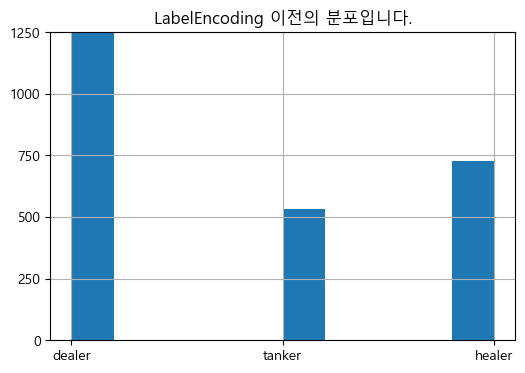

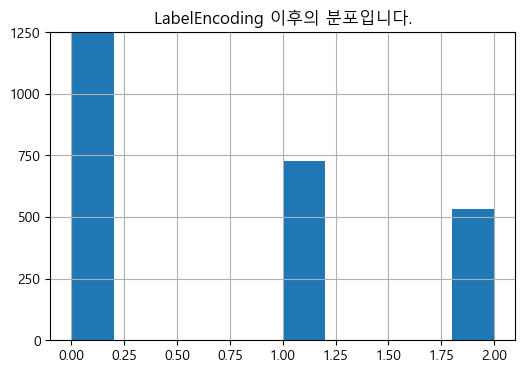

In [249]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False     

plt.figure(figsize=(6,4))
target.hist()
plt.title("LabelEncoding 이전의 분포입니다.")
plt.ylim(0, 1250)  
plt.yticks(range(0, 1251, 250))  
plt.show()

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(target)

plt.figure(figsize=(6,4))
pd.Series(target_encoded).hist()
plt.title("LabelEncoding 이후의 분포입니다.")
plt.ylim(0, 1250)  
plt.yticks(range(0, 1251, 250))  
plt.show()


<img src="./참고이미지/Q9/Q9_4.png" width="40%">

## Step3 모델 학습

<b>사용 인공지능 모델</b>
- 인공지능 모델은 ExplainableBoostingClassifier를 사용합니다.

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

ebm = ExplainableBoostingClassifier(
    random_state=42,
    n_jobs=1,
    max_rounds=50,
    early_stopping_rounds=5,
    learning_rate=0.05
)
ebm.fit(X_train, y_train_enc)

y_pred = ebm.predict(X_test)

print("Accuracy:", accuracy_score(y_test_enc, y_pred))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

# Step3: 인공지능 모델 학습 완료

Accuracy: 0.8637931034482759

Classification Report:
               precision    recall  f1-score   support

      dealer       0.86      0.94      0.90       320
      healer       0.93      0.76      0.84       137
      tanker       0.82      0.79      0.80       123

    accuracy                           0.86       580
   macro avg       0.87      0.83      0.84       580
weighted avg       0.87      0.86      0.86       580



<img src="./참고이미지/Q10/Q10_1.png" width="45%">